<a href="https://colab.research.google.com/github/edsondamasceno/Data-Analysis/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de cohort

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import datetime as dt

# bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from operator import attrgetter

In [2]:
#lendo a base de dados
file ='/content/drive/MyDrive/Data Analysis/Dataset/Year 2009-2010.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

df = pd.read_csv(file,encoding='ISO-8859-1')

In [3]:
#visualizando os dados
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [4]:
#Excluindoos valores ausentes e duplicados
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,410763.000000,410763.000000,410763.000000
mean,12.923735,3.908358,15353.621857
std,102.039550,71.714794,1681.657665
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13979.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16797.000000
max,19152.000000,25111.090000,18287.000000


In [6]:
#Existem alguns valores negativos nas variáveis ​​Quantidade e Preço.
#filtrando os dados maiores que zero.

df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [8]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [9]:
df['cohort'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')

In [10]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)

In [11]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [12]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4


In [13]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

In [14]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cohort_size = cohort_pivot.iloc[:, 0]

In [16]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

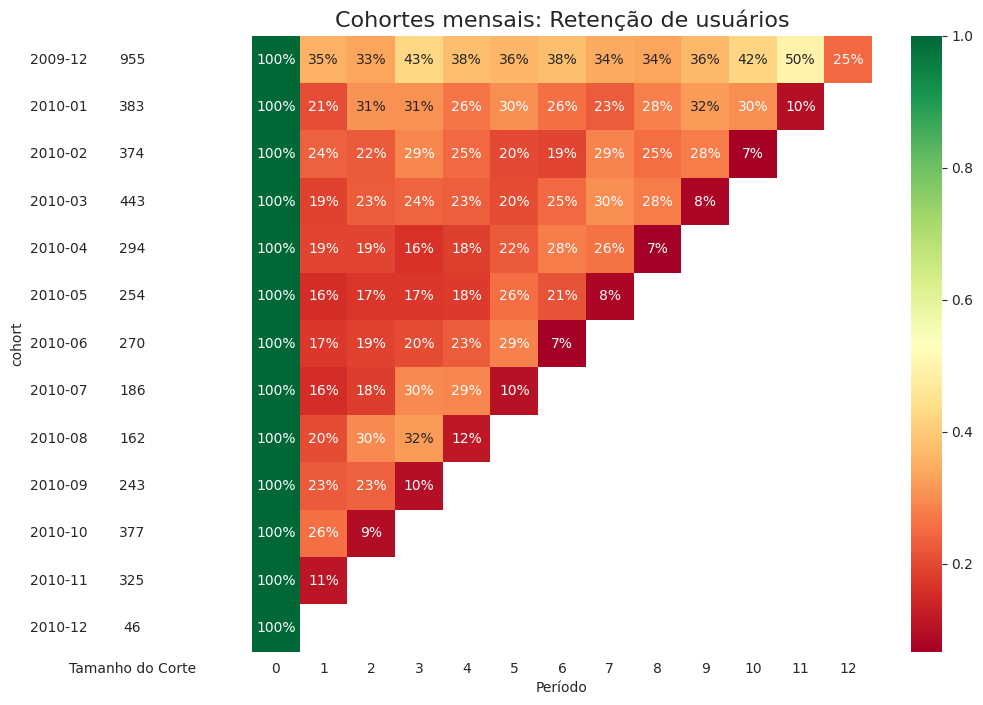

In [17]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # matriz de retenção
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Cohortes mensais: Retenção de usuários', fontsize=16)
    ax[1].set(xlabel='Período',
              ylabel='')

    # tamanho do corte
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamanho do Corte'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

# Analisando Retenção, Reativação, Churn e Possiveis Churn

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_month,cohort
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009-12


In [19]:
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'First purchase date']

In [20]:
first_purchase

,Customer ID,First purchase date
0,12346.0,2009-12-14 08:34:00
1,12347.0,2010-10-31 14:20:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-04-29 13:20:00
4,12351.0,2010-11-29 15:23:00
...,...,...
4307,18283.0,2010-02-19 17:16:00
4308,18284.0,2010-10-04 11:33:00
4309,18285.0,2010-02-17 10:24:00
4310,18286.0,2009-12-16 10:45:00


In [21]:
last_purchase = df.groupby('Customer ID')['InvoiceDate'].max().reset_index()
last_purchase.columns = ['Customer ID', 'Last purchase date']

In [22]:
last_purchase

,Customer ID,Last purchase date
0,12346.0,2010-06-28 13:53:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12351.0,2010-11-29 15:23:00
...,...,...
4307,18283.0,2010-11-22 15:30:00
4308,18284.0,2010-10-04 11:33:00
4309,18285.0,2010-02-17 10:24:00
4310,18286.0,2010-08-20 11:57:00


In [23]:
#Gerando copia do dataframe original
df_new = df

In [24]:
#Mesclando o dataframe original com as datas da primeira e ultima compra
df_new = df_new.merge(first_purchase, on='Customer ID')
df_new = df_new.merge(last_purchase, on='Customer ID')

In [25]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_month,cohort,First purchase date,Last purchase date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00


#Analise de Retenção

In [26]:
#Clientes retidos são aqueles que fizeram uma nova compra antes do periodo de 30 dias
df_new['Retido'] = (df_new['InvoiceDate'] <= df_new['First purchase date'] + pd.Timedelta(days=31)) & (df_new['InvoiceDate'] > df_new['First purchase date'])

#Agrupar por ID para obter a informação de retenção apenas uma vez por usuario
df_retention = df_new.groupby('Customer ID').agg({'Retido': 'max'}).reset_index()

#Juntando a classificação de retenção a tabela original
df_new = df_new.merge(df_retention[['Customer ID', 'Retido']], on='Customer ID', how='left', suffixes=('', '_'))


In [27]:
#Removendo a coluna temporaria do datafrme original
df_new.drop(columns=['Retido'], inplace=True)

#Renomeando
df_new.rename(columns={'Retido_': 'Retido_30'}, inplace=True)

In [28]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_month,cohort,First purchase date,Last purchase date,Retido_30
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False


# Analise de Reativação

In [29]:
#cliente que fizeram uma nova compra depois do periodo de 30 dias apos a primeira compra
df_new['Reactivated aux'] = (df_new['InvoiceDate'] >= df_new['First purchase date'] + pd.Timedelta(days=31)) & (df_new['Retido_30'] != True)

#Agrupar por ID para obter a informação de reativação apenas uma vez por usuario
df_reactivated = df_new.groupby('Customer ID').agg({'Reactivated aux': 'max'}).reset_index()

#Juntando a classificação de reativação a tabela original
df_new = df_new.merge(df_reactivated[['Customer ID', 'Reactivated aux']], on='Customer ID', how='left', suffixes=('', '_'))

In [30]:
#Removendo a coluna temporaria do datafrme original
df_new.drop(columns=['Reactivated aux'], inplace=True)

#Renomeando
df_new.rename(columns={'Reactivated aux_': 'Reactivated'}, inplace=True)

In [31]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_month,cohort,First purchase date,Last purchase date,Retido_30,Reactivated
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True


#Analise de Churn

Cliente que não foram retidos ou reativados e não fizeram uma compra a mais de 90 dias

In [32]:
current_date = '01-01-2011'
current_date = pd.to_datetime(current_date)

In [33]:
df_new['days'] = (current_date - df_new['Last purchase date']).dt.days

#Verificando se o cliente não foi retido e nem reativado e sua ultima compra faz mais de 90 dias
df_new['Churn'] = (df_new['Reactivated'] != True) & (df_new['Retido_30'] != True) & (df_new['days'] > 90)


In [34]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_month,cohort,First purchase date,Last purchase date,Retido_30,Reactivated,days,Churn
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False


# Analise de clientes possiveis Churn

Clientes que foram retidos ou reativados e que não compram a mais de 90 dias

In [35]:
df_new['churn risk'] = ((df_new['Reactivated'] == True) | (df_new['Retido_30'] == True) & (df_new['days'] > 90))

In [36]:
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_month,cohort,First purchase date,Last purchase date,Retido_30,Reactivated,days,Churn,churn risk
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False,True
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False,True
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False,True
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False,True
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,2009-12,2009-12-01 07:45:00,2010-01-29 11:42:00,True,False,336,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False,True
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False,True
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False,True
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,2009-12,2009-12-06 16:17:00,2010-12-09 20:01:00,False,True,22,False,True


#Calculando Taxas

In [37]:
total_data = first_purchase.groupby(first_purchase['First purchase date'].dt.to_period('M')).agg({'Customer ID': 'nunique'})

In [38]:
total_data

,Customer ID
First purchase date,
2009-12,955
2010-01,383
2010-02,374
2010-03,443
2010-04,294
2010-05,254
2010-06,270
2010-07,186
2010-08,162


In [46]:
#Calculando a taxa de retidos
retention_data = df_new[df_new['Retido_30']].groupby(df_new['First purchase date'].dt.to_period('M')).agg({'Customer ID': 'nunique'})
retention_rate = (retention_data/total_data).fillna(0) * 100

In [47]:
retention_rate

,Customer ID
First purchase date,
2009-12,33.821990
2010-01,20.365535
2010-02,23.796791
2010-03,17.832957
2010-04,18.027211
2010-05,17.716535
2010-06,21.111111
2010-07,21.505376
2010-08,22.222222


In [49]:
#Calculando a taxa de Churn
churn_data = df_new[df_new['Churn']].groupby(df_new['First purchase date'].dt.to_period('M')).agg({'Customer ID': 'nunique'})
churn_rate = (churn_data/total_data).fillna(0) * 100

In [50]:
churn_rate

,Customer ID
First purchase date,
2009-12,10.680628
2010-01,15.404700
2010-02,20.588235
2010-03,26.410835
2010-04,29.591837
2010-05,35.433071
2010-06,36.666667
2010-07,34.946237
2010-08,41.975309


In [51]:
#Calculando a taxa de risco Churn
risk_churn_data = df_new[df_new['churn risk']].groupby(df_new['First purchase date'].dt.to_period('M')).agg({'Customer ID': 'nunique'})
risk_churn_rate = (risk_churn_data/total_data).fillna(0) * 100

In [58]:
risk_churn_rate

,Customer ID
First purchase date,
2009-12,62.722513
2010-01,70.496084
2010-02,66.310160
2010-03,62.753950
2010-04,58.843537
2010-05,55.905512
2010-06,52.592593
2010-07,55.913978
2010-08,45.679012


In [75]:
#Calculando a taxa de reativação
reactivated_data = df_new[df_new['Reactivated']].groupby(df_new['First purchase date'].dt.to_period('M')).agg({'Customer ID': 'nunique'})
reactivated_rate = (reactivated_data/total_data).fillna(0) * 100

In [76]:
reactivated_rate

,Customer ID
First purchase date,
2009-12,55.497382
2010-01,64.229765
2010-02,55.614973
2010-03,55.756208
2010-04,52.380952
2010-05,46.850394
2010-06,42.222222
2010-07,43.548387
2010-08,35.802469


#Exportando dados pro Excel

In [78]:
retention_rate.to_excel('/content/drive/MyDrive/Data Analysis/Result/retencao.xlsx')
churn_rate.to_excel('/content/drive/MyDrive/Data Analysis/Result/churn.xlsx')
risk_churn_rate.to_excel('/content/drive/MyDrive/Data Analysis/Result/risk_churn.xlsx')
reactivated_rate.to_excel('/content/drive/MyDrive/Data Analysis/Result/reactivation.xlsx')
df_new.to_excel('/content/drive/MyDrive/Data Analysis/Result/dataframe.xlsx')

#Plotando Graficos

In [87]:
df_churn = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/churn.xlsx')
df_risk_churn = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/risk_churn.xlsx')
df_retention = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/retencao.xlsx')
df_reactivation = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/reactivation.xlsx')

In [88]:
df_reactivation.head()

,First purchase date,Customer ID
0,2009-12-01,55.497382
1,2010-01-01,64.229765
2,2010-02-01,55.614973
3,2010-03-01,55.756208
4,2010-04-01,52.380952


In [89]:
#Renomeando
df_churn.rename(columns={'First purchase date': 'date', 'Customer ID': 'rate'}, inplace=True)
df_risk_churn.rename(columns={'First purchase date': 'date', 'Customer ID': 'rate'}, inplace=True)
df_retention.rename(columns={'First purchase date': 'date', 'Customer ID': 'rate'}, inplace=True)
df_reactivation.rename(columns={'First purchase date': 'date', 'Customer ID': 'rate'}, inplace=True)

In [92]:
df_churn['new_date'] = df_churn['date'].dt.to_period('M')
df_risk_churn['new_date'] = df_risk_churn['date'].dt.to_period('M')
df_retention['new_date'] = df_retention['date'].dt.to_period('M')
df_reactivation['new_date'] = df_reactivation['date'].dt.to_period('M')

In [93]:
df_reactivation.head()

,date,rate,new_date
0,2009-12-01,55.497382,2009-12
1,2010-01-01,64.229765,2010-01
2,2010-02-01,55.614973,2010-02
3,2010-03-01,55.756208,2010-03
4,2010-04-01,52.380952,2010-04


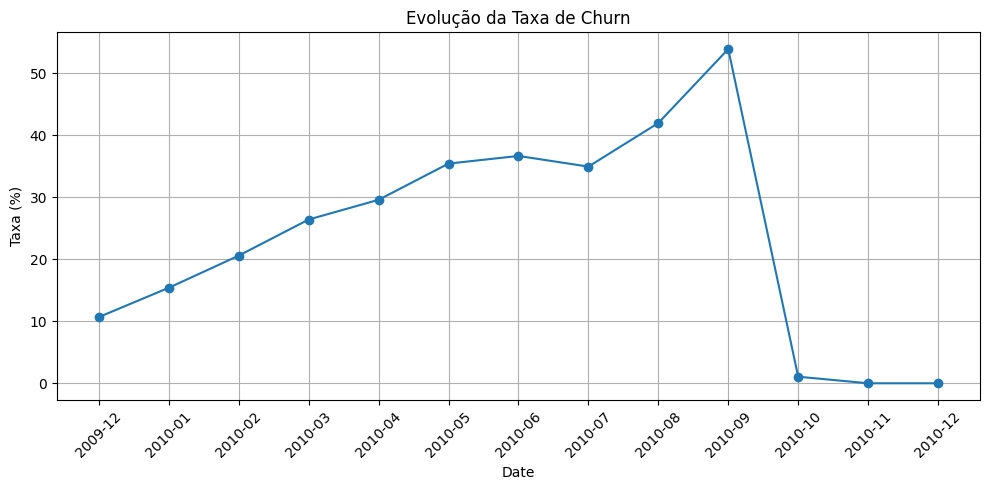

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(df_churn["new_date"])), df_churn["rate"], marker='o')

plt.xticks(range(len(df_churn["new_date"])), df_churn["new_date"], rotation=45)

plt.xlabel("Date")
plt.ylabel("Taxa (%)")
plt.title("Evolução da Taxa de Churn")
plt.grid(True)
plt.tight_layout()
plt.show()

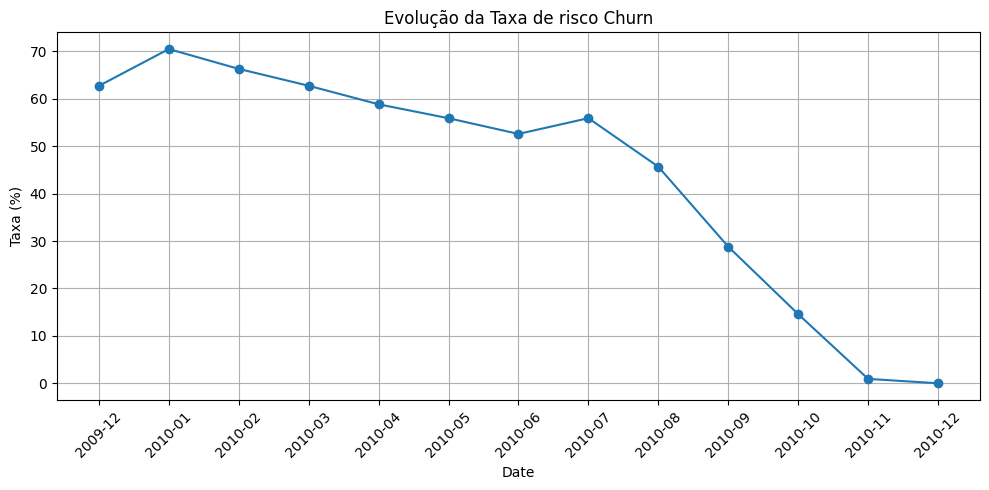

In [96]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(len(df_risk_churn["new_date"])), df_risk_churn["rate"], marker='o')

plt.xticks(range(len(df_risk_churn["new_date"])), df_risk_churn["new_date"], rotation=45)

plt.xlabel("Date")
plt.ylabel("Taxa (%)")
plt.title("Evolução da Taxa de risco Churn")
plt.grid(True)
plt.tight_layout()
plt.show()

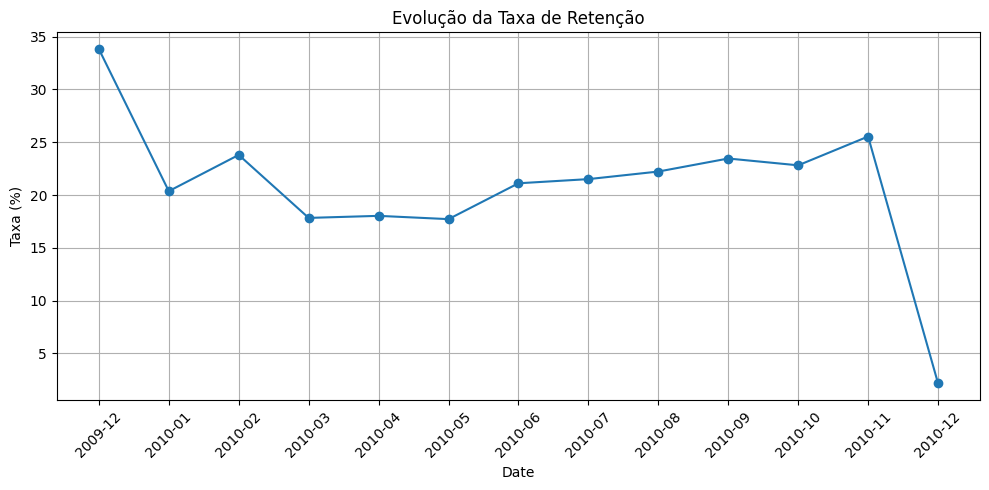

In [97]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(len(df_retention["new_date"])), df_retention["rate"], marker='o')

plt.xticks(range(len(df_retention["new_date"])), df_retention["new_date"], rotation=45)

plt.xlabel("Date")
plt.ylabel("Taxa (%)")
plt.title("Evolução da Taxa de Retenção")
plt.grid(True)
plt.tight_layout()
plt.show()

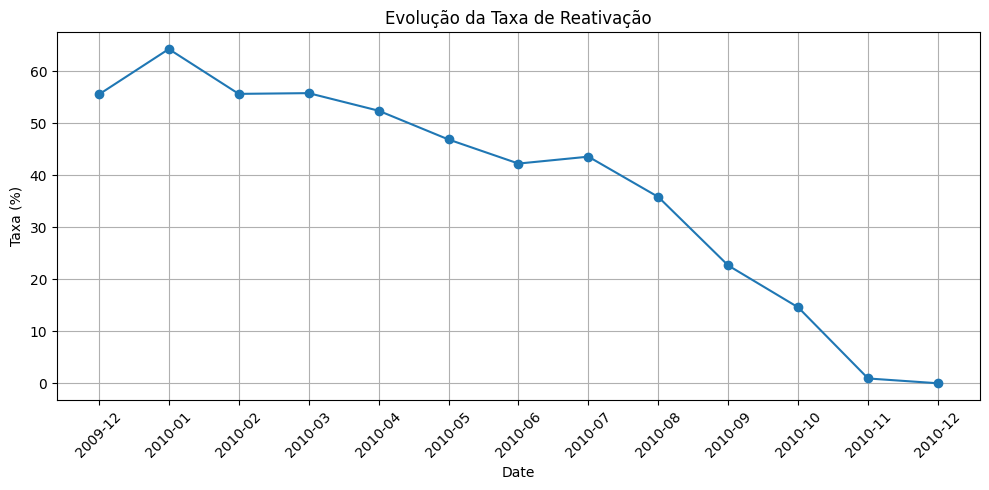

In [98]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(len(df_reactivation["new_date"])), df_reactivation["rate"], marker='o')

plt.xticks(range(len(df_reactivation["new_date"])), df_reactivation["new_date"], rotation=45)

plt.xlabel("Date")
plt.ylabel("Taxa (%)")
plt.title("Evolução da Taxa de Reativação")
plt.grid(True)
plt.tight_layout()
plt.show()